# Analysis

In [1]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import time
import timeit


import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter

# Accidents per year

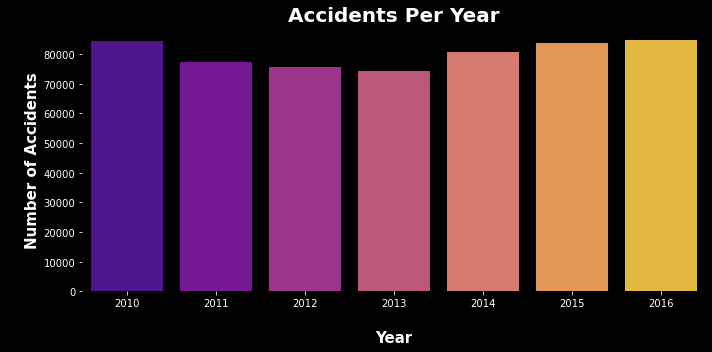

In [115]:
accidentsperyear = df.groupby(['year'])['accident_index'].count()

# prepare plot
# plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(accidentsperyear.index,accidentsperyear.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Year",fontsize=20,fontweight="bold")
plt.xlabel("\nYear", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('accidentsperyear.png')
plt.tight_layout()

# Accidents Per Month

In [ ]:
accidentspermonth = df.groupby(['month'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
colors = sns.color_palette("plasma_r", n_colors=12)
mt=sns.barplot(accidentspermonth.index,accidentspermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
#ax is the axes instance
group_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]

mt.set_xticklabels(group_labels)
plt.title("Accidents Per Month",fontsize=20,fontweight="bold")
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel("\nMonth", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('accidentspermonth.png')
plt.tight_layout()

# Accidents by Weekday per Year

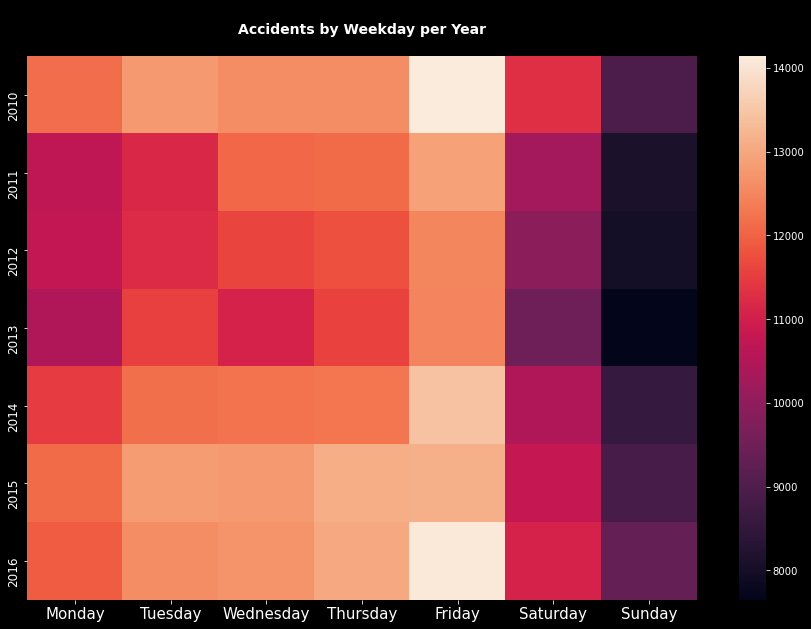

In [118]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
accweekday = df.groupby(['year', 'day_of_week']).size()
accweekday = accweekday.rename_axis(['year', 'day_of_week'])\
                               .unstack('day_of_week')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='rocket')
plt.title('\nAccidents by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('accidentsbyweekdayperyear.png')
plt.show()

# Accidents Per Season

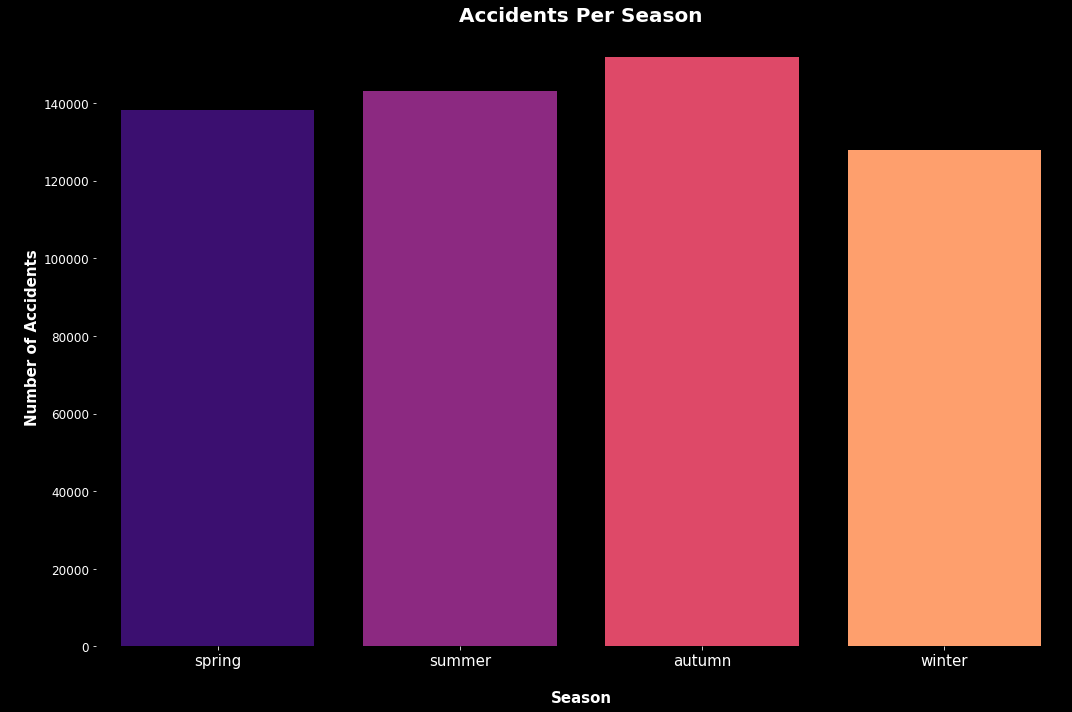

In [129]:
accidentsperseason = df.groupby(['season'])['accident_index'].count()
seaord=['spring', 'summer', 'autumn','winter']
# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(accidentsperseason.index,accidentsperseason.values, order=seaord, 
            saturation=1, palette='magma')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nSeason", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentsperseason.png')

In [99]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"After Work Rush (16-18)", "Evening (18-22)", "Night (22-6)"

timeofdaygroups = {'1': "Morning Rush",
                   '2': "Day",
                   '3': "Lunch Rush",
                   '4': "Afternoon",
                   '5': "After Work Rush",
                   '6': "Evening",
                   '7': "Night"}
df['time_of_day']=df['time_of_day'].map(timeofdaygroups)

# Accidents Per Time of Day

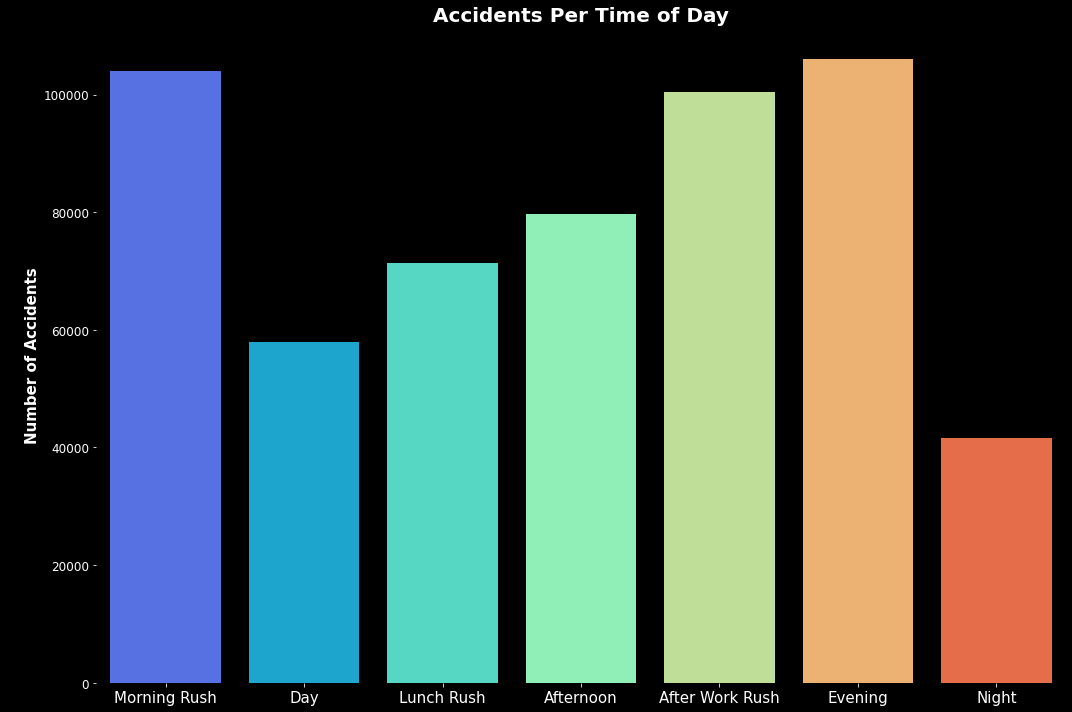

In [100]:
accidentspertod = df.groupby(['time_of_day'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
tod=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "After Work Rush", "Evening", "Night"]
sns.barplot(accidentspertod.index,accidentspertod.values, order=tod, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentspertod.png')

In [101]:
#dataframe where accidents are Slight
not_serious = df[(df['accident_seriousness']=="Not Serious")]
print("Not Serious Group Shape:", not_serious.shape)

not_serious.accident_seriousness.value_counts()

Not Serious Group Shape: (492804, 60)


Not Serious    492804
Name: accident_seriousness, dtype: int64

In [102]:
#dataframe where accidents are serious
serious= df[(df['accident_seriousness']=="Serious")]

print("Serious Group Shape:", serious.shape)
serious.accident_seriousness.value_counts()

Serious Group Shape: (68331, 60)


Serious    68331
Name: accident_seriousness, dtype: int64

In [103]:
#map 1, 2, 3 in did_police_officer_attend_scene_of_accident with Yes, No,Self-reported
policeattend = {1: "Yes", 2:"No", 3:"Self-Reported"}
not_serious['did_police_officer_attend_scene_of_accident']=not_serious['did_police_officer_attend_scene_of_accident'].map(policeattend)
df['did_police_officer_attend_scene_of_accident']=df['did_police_officer_attend_scene_of_accident'].map(policeattend)
serious['did_police_officer_attend_scene_of_accident']=serious['did_police_officer_attend_scene_of_accident'].map(policeattend)

In [104]:
imddecile = {1:"Most deprived 10%", 2:"More deprived 10-20%", 3:"More deprived 20-30%", 
             4:"More deprived 30-40%", 5:"More deprived 40-50%", 6:"Less deprived 40-50%", 
             7:"Less deprived 30-40%", 8:"Less deprived 20-30%", 9:"Less deprived 10-20%", 
             10:"Least deprived 10%"}

not_serious['driver_imd_decile']=not_serious['driver_imd_decile'].map(imddecile)
df['driver_imd_decile']=df['driver_imd_decile'].map(imddecile)
serious['driver_imd_decile']=serious['driver_imd_decile'].map(imddecile)

In [105]:
#setups for adding frequencies to visualizations
dftotal= float(len(df))
nstotal= float(len(not_serious))
setotal= float(len(serious))

# Did Police Officer Attend Scene Of Accident

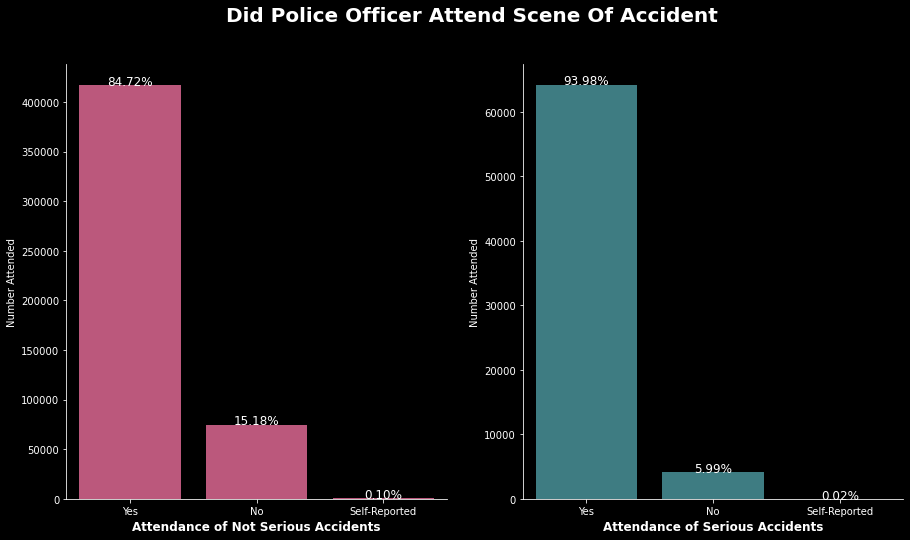

In [130]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 = sns.countplot( "did_police_officer_attend_scene_of_accident", hue="accident_seriousness", 
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("did_police_officer_attend_scene_of_accident", hue="accident_seriousness",  
              palette="crest", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Did Police Officer Attend Scene Of Accident", fontsize=20, fontweight="bold")
ax1.set_xlabel('Attendance of Not Serious Accidents', fontsize=12, fontweight="bold")
ax2.set_xlabel('Attendance of Serious Accidents', fontsize=12, fontweight="bold")
ax1.set_ylabel('Number Attended')
ax2.set_ylabel('Number Attended')
ax1.get_legend().remove()
ax2.get_legend().remove()
plt.savefig('did_police_officer_attend_scene_of_accident.png')
fig.show()

# First Point of Impact in Accidents

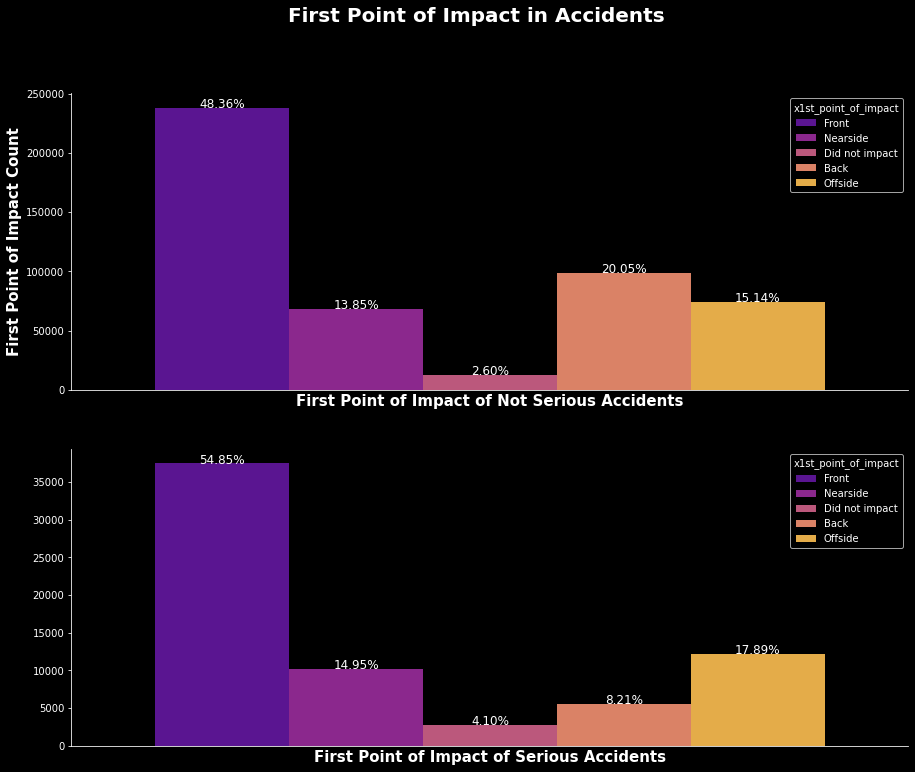

In [107]:
# First Point of Impact Vs Accident Seriousness (Not Serious)
fpoa_order =["Front", "Nearside", "Did not impact", "Back", "Offside"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness",hue="x1st_point_of_impact", hue_order=fpoa_order,  
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness",hue="x1st_point_of_impact", hue_order=fpoa_order, 
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("First Point of Impact in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('First Point of Impact of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('First Point of Impact of Serious Accidents',  fontsize=15, fontweight="bold")
ax1.set_ylabel('First Point of Impact Count', fontsize=15, fontweight="bold")
ax2.set_ylabel('')
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.savefig('x1st_point_of_impact.png')
fig.show()

# Number of Vehicles in Accidents

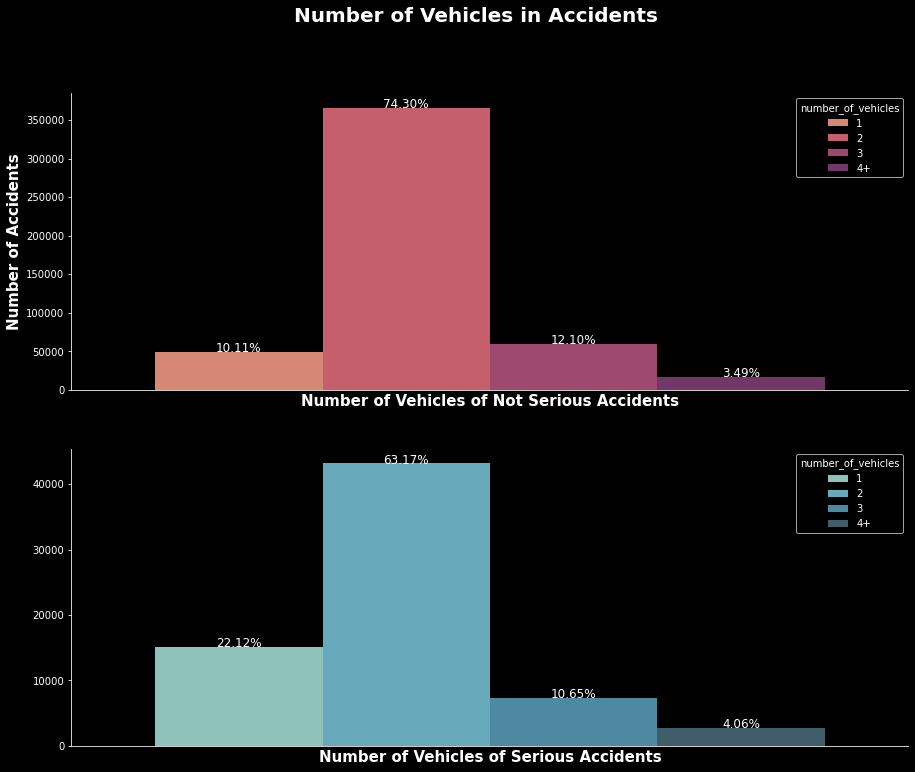

In [131]:
nov_order=["1","2", "3", "4+"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="number_of_vehicles", hue_order=nov_order,
              palette="flare", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness", hue="number_of_vehicles", hue_order=nov_order,
              palette="GnBu_d", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Number of Vehicles in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Number of Vehicles of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Number of Vehicles of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('number_of_vehicles.png')
fig.show()

# Speed Limit in Accidents

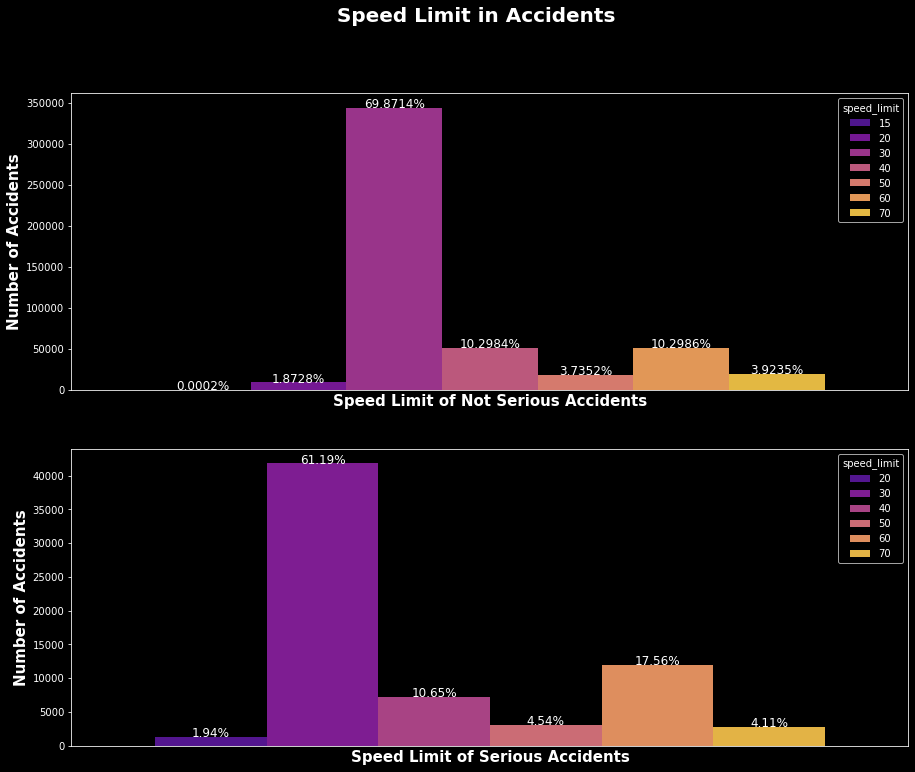

In [109]:
splt_order=[15, 20,30,40,50,60,70]
splt_order2=[20,30,40,50,60,70]
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))

ax1 =sns.countplot("accident_seriousness", hue="speed_limit", hue_order=splt_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.4f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="speed_limit", hue_order=splt_order2,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Speed Limit in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Speed Limit of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Speed Limit of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
plt.savefig('speed_limit.png')
fig.show()

# Urban or Rural Areas vs Accidents

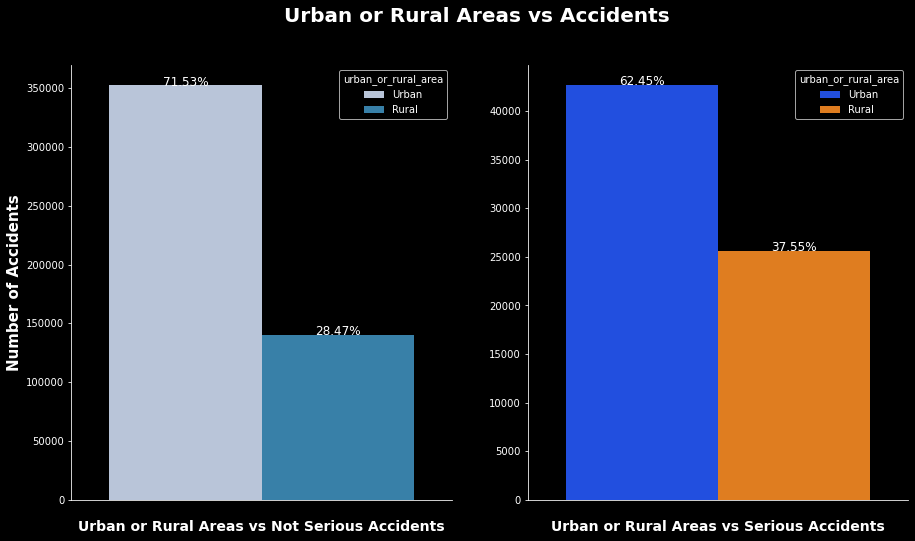

In [132]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness",  hue="urban_or_rural_area",
              palette="PuBu", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness",  hue="urban_or_rural_area",
              palette="bright", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Urban or Rural Areas vs Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nUrban or Rural Areas vs Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nUrban or Rural Areas vs Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('urban_or_rural_area.png')
fig.show()


# Skidding and Overturning in Accidents

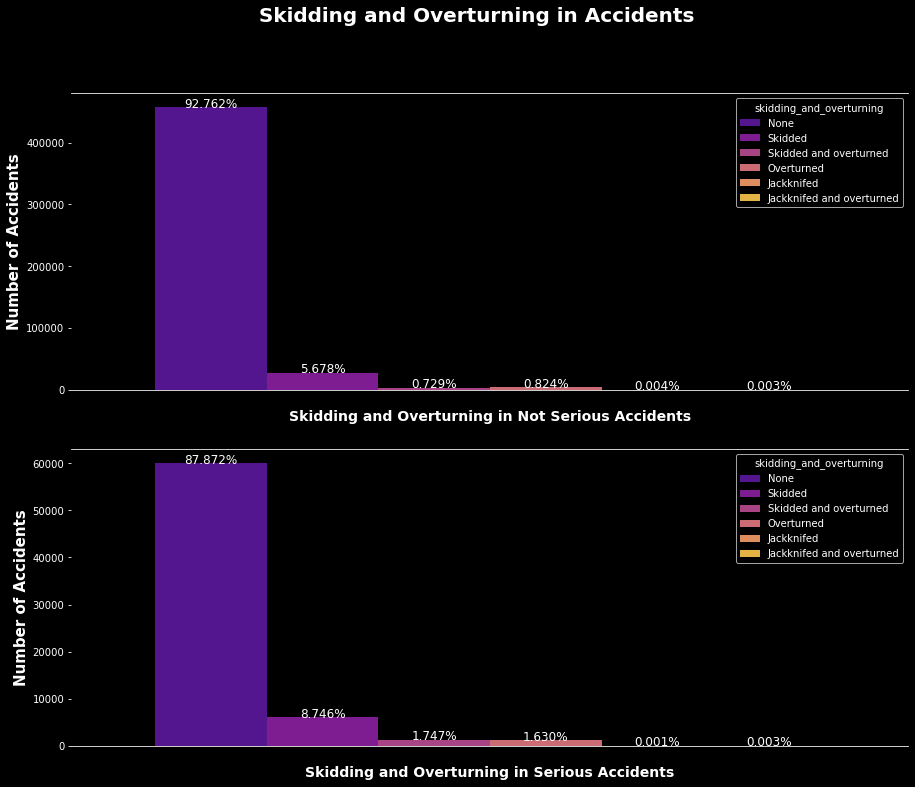

In [111]:
sao_order=["None", "Skidded", "Skidded and overturned", "Overturned", "Jackknifed", 
           "Jackknifed and overturned"]
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="skidding_and_overturning", hue_order=sao_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="skidding_and_overturning", hue_order=sao_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Skidding and Overturning in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nSkidding and Overturning in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nSkidding and Overturning in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
plt.savefig('skidding_and_overturning.png')
fig.show()

# Vehicle Leaving Carriageway in Accidents

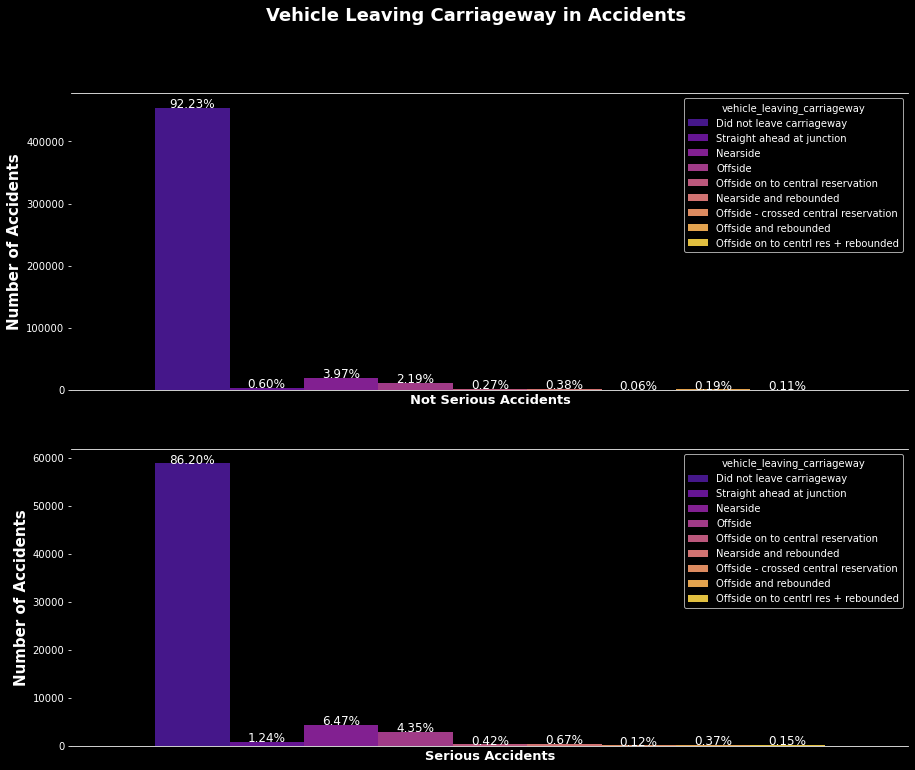

In [112]:
vlc_order=["Did not leave carriageway", "Straight ahead at junction", "Nearside", 
           "Offside", "Offside on to central reservation", "Nearside and rebounded", 
           "Offside - crossed central reservation", "Offside and rebounded", 
           "Offside on to centrl res + rebounded"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="vehicle_leaving_carriageway", hue_order=vlc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_leaving_carriageway", hue_order=vlc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Vehicle Leaving Carriageway in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Not Serious Accidents\n\n', fontsize=13, fontweight="bold")
ax2.set_xlabel('Serious Accidents', fontsize=13, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.savefig('vehicle_leaving_carriageway.png')
fig.show()

# Sex of Driver in Accidents

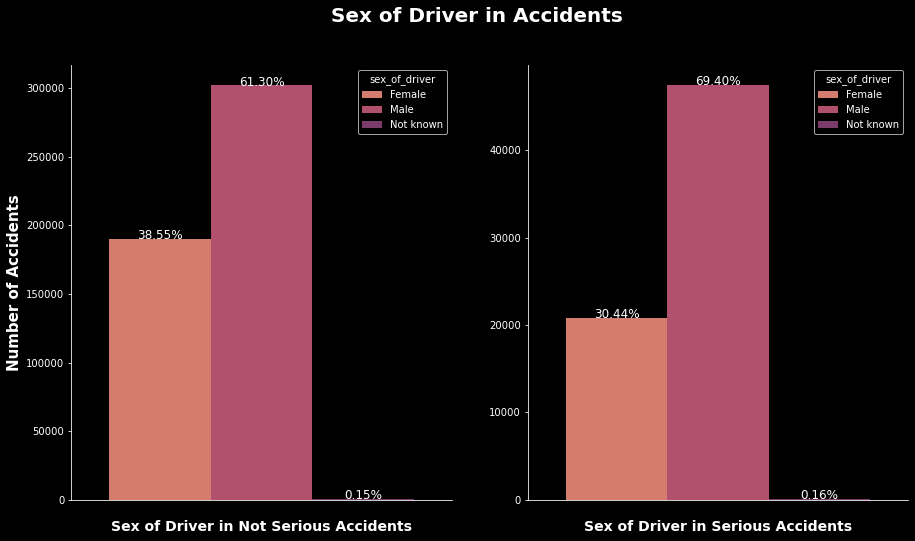

In [137]:
sod_order=["Female", "Male", "Not known"]

fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="sex_of_driver", hue_order=sod_order,
              palette="flare", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness", hue="sex_of_driver", hue_order=sod_order,
              palette="flare", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Sex of Driver in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nSex of Driver in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nSex of Driver in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('sex_of_driver.png')
fig.show()

# Vehicle Type in Accidents

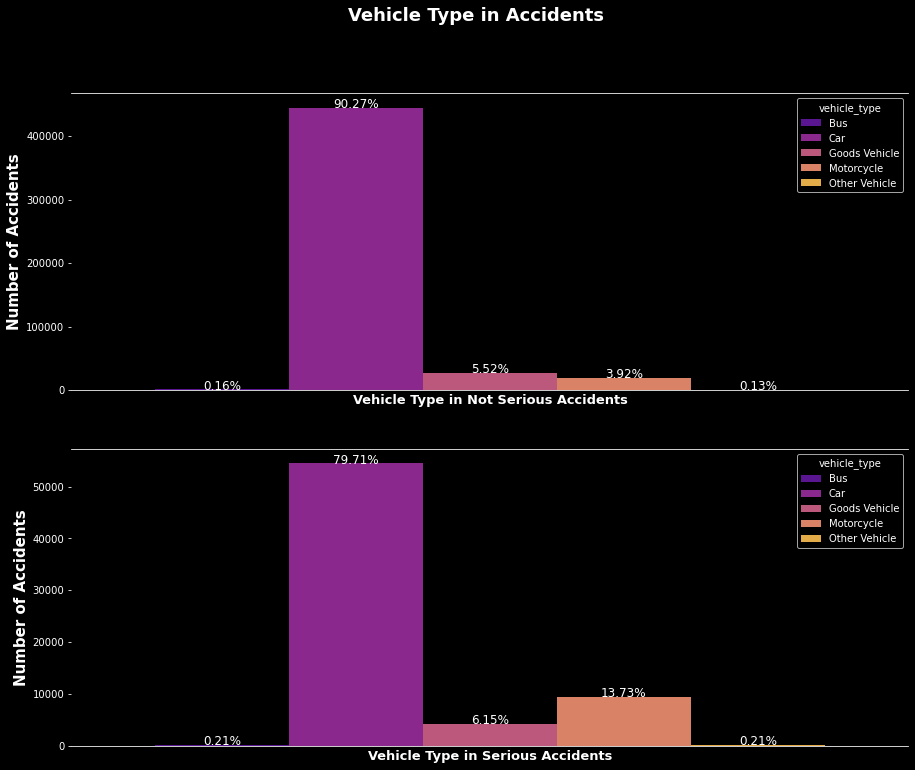

In [138]:
vt_order=['Bus', 'Car', 'Goods Vehicle', 'Motorcycle', 'Other Vehicle']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Vehicle Type in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Vehicle Type in Not Serious Accidents\n\n', fontsize=13, fontweight="bold")
ax2.set_xlabel('Vehicle Type in Serious Accidents', fontsize=13, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.savefig('vehicle_type.png')
fig.show()

# Vehicle Manuevers in Accidents

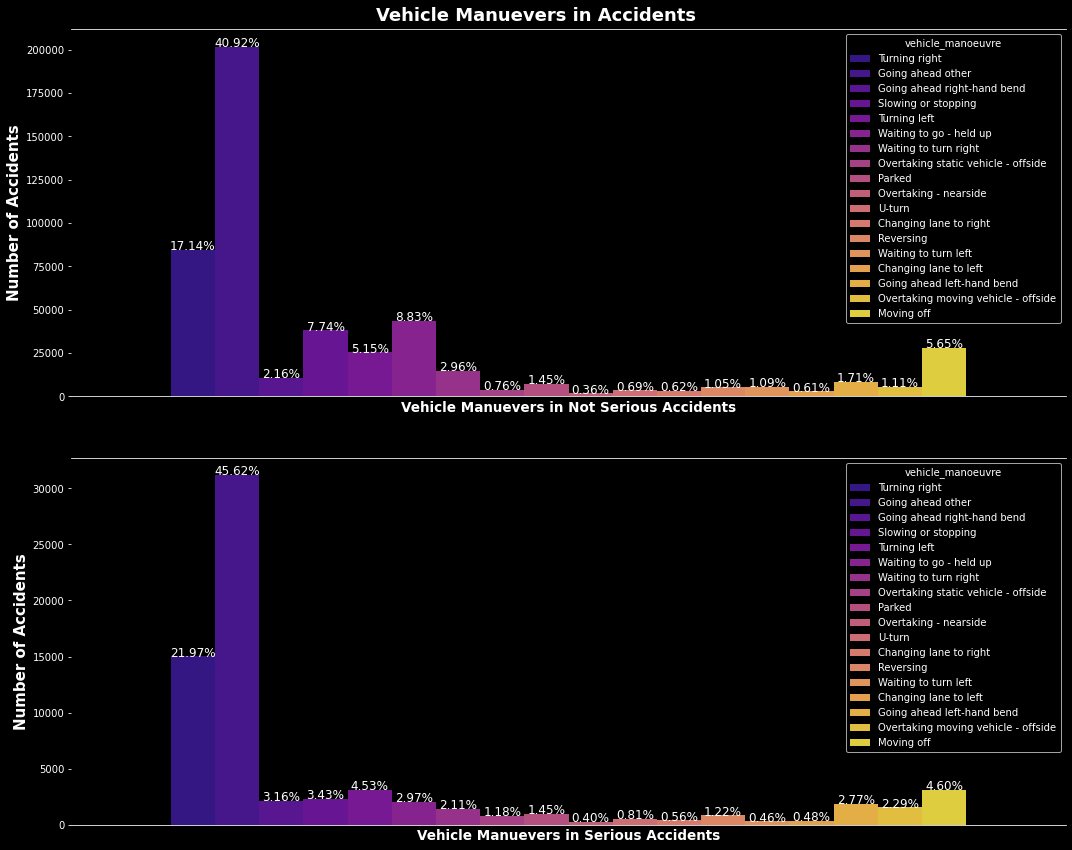

In [139]:
vm_order=['Turning right', 'Going ahead other', 'Going ahead right-hand bend',
          'Slowing or stopping', 'Turning left', 'Waiting to go - held up',
          'Waiting to turn right', 'Overtaking static vehicle - offside' ,
          'Parked', 'Overtaking - nearside', 'U-turn', 'Changing lane to right', 
          'Reversing', 'Waiting to turn left', 'Changing lane to left',
          'Going ahead left-hand bend', 'Overtaking moving vehicle - offside', 'Moving off']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="vehicle_manoeuvre",hue_order=vm_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_manoeuvre",hue_order=vm_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Vehicle Manuevers in Accidents", fontsize=18, fontweight="bold")

ax1.set_xlabel('Vehicle Manuevers in Not Serious Accidents\n\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Vehicle Manuevers in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.tight_layout() # No overlap of subplots

plt.savefig('vehicle_manoeuvre.png')
fig.show()

# Driver Home Type Area in Accidents

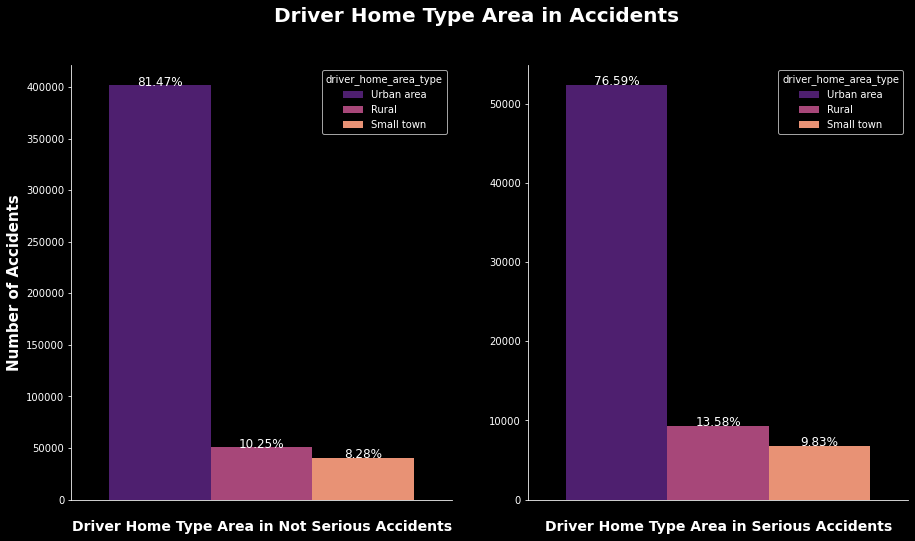

In [140]:
dhoa_order=['Urban area', 'Rural', 'Small town']

fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="driver_home_area_type", hue_order=dhoa_order,
              palette="magma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness", hue="driver_home_area_type", hue_order=dhoa_order,
              palette="magma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Driver Home Type Area in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nDriver Home Type Area in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nDriver Home Type Area in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('driver_home_area.png')
fig.show()

In [169]:
# #age_band_of_driver
# abod_order=['0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','Over 75']


# fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
# sns.despine(top=False, right=True, left=True)

# ax1 =sns.countplot("accident_seriousness", hue="age_band_of_driver", hue_order=abod_order,
#               palette="plasma", data=not_serious, ax=ax[0])
# for p in ax1.patches:
#     height = p.get_height()
#     ax1.text(p.get_x()+p.get_width()/2.,
#             height + 4,
#             '{:1.2f}%'.format(height/nstotal*100),
#             ha="center",fontsize=12) 
    
# ax2 =  sns.countplot("accident_seriousness", hue="age_band_of_driver", hue_order=abod_order,
#               palette="plasma", data=serious, ax=ax[1])
# for p in ax2.patches:
#     height = p.get_height()
#     ax2.text(p.get_x()+p.get_width()/2.,
#             height + 4,
#             '{:1.2f}%'.format(height/setotal*100),
#             ha="center",fontsize=12)
    
# fig.suptitle("Age Band of Driver in Accidents", fontsize=18, fontweight="bold")
# ax1.set_xlabel('Age Band of Driver in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
# ax2.set_xlabel('Age Band of Driver in Serious Accidents', fontsize=13.5, fontweight="bold")
# ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
# ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
# ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


# plt.savefig('age_band_of_driver.png')
# fig.show()

# Junction Control in Accidents 

In [ ]:
# jc_order = ['Give way or uncontrolled', 'Auto traffic signal', 'Authorised person',
            'Stop sign','Not at junction or within 20 metres']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="junction_control", hue_order=jc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="junction_control", hue_order=jc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Junction Control in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Junction Control in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Junction Control in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('junction_control.png')
fig.show()

# Objects Hit Off Carriageway in Accidents

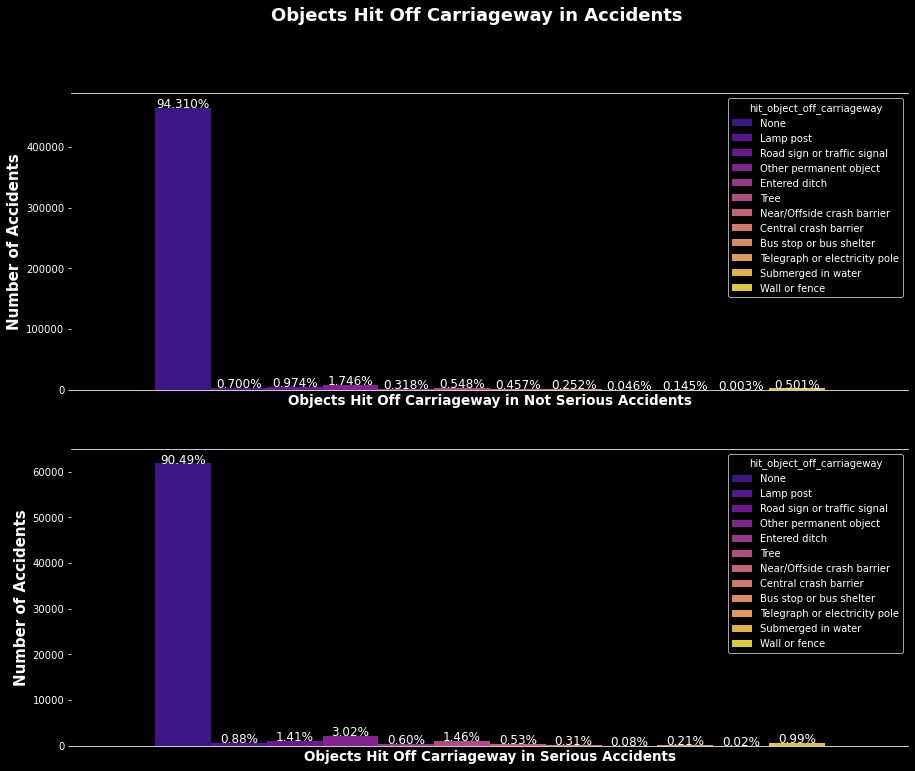

In [144]:
hooffc_order=['None', 'Lamp post', 'Road sign or traffic signal', 'Other permanent object',
              'Entered ditch', 'Tree', 'Near/Offside crash barrier','Central crash barrier',
              'Bus stop or bus shelter', 'Telegraph or electricity pole', 'Submerged in water',
              'Wall or fence']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="hit_object_off_carriageway", hue_order=hooffc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="hit_object_off_carriageway", hue_order=hooffc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Objects Hit Off Carriageway in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Objects Hit Off Carriageway in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Objects Hit Off Carriageway in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('hit_object_off_carriageway.png')
fig.show()


# Objects Hit in Carriageway in Accidents

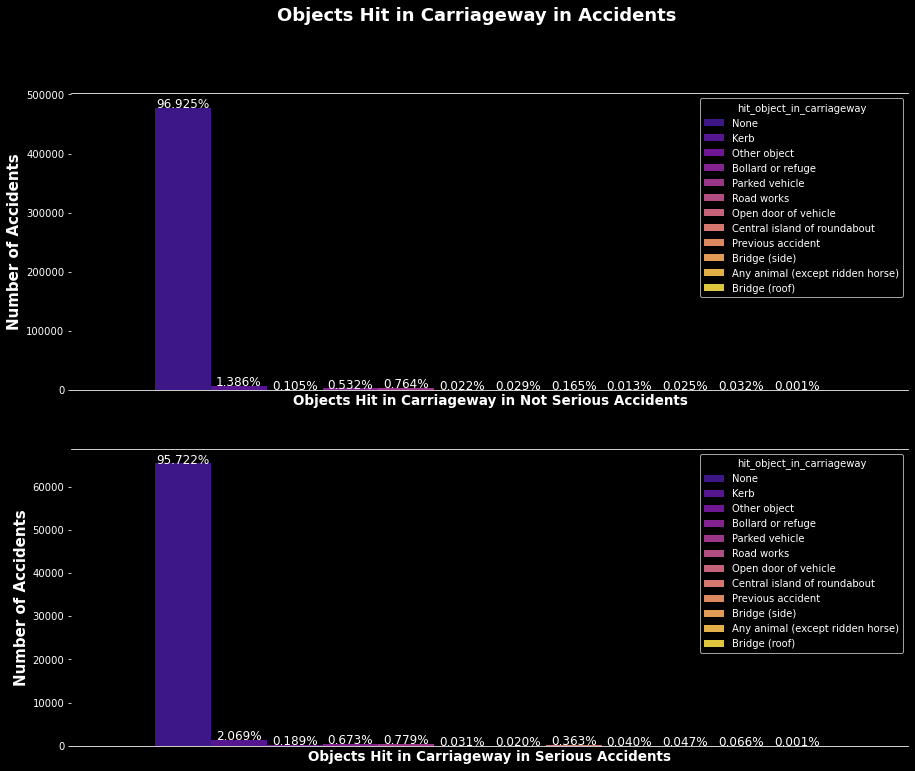

In [145]:
hoinc_order=['None', 'Kerb', 'Other object', 'Bollard or refuge', 'Parked vehicle',
             'Road works', 'Open door of vehicle', 'Central island of roundabout',
             'Previous accident', 'Bridge (side)', 'Any animal (except ridden horse)',
             'Bridge (roof)']


fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="hit_object_in_carriageway", hue_order=hoinc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="hit_object_in_carriageway", hue_order=hoinc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Objects Hit in Carriageway in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Objects Hit in Carriageway in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Objects Hit in Carriageway in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('hit_object_in_carriageway.png')
fig.show()


# Driver Area Deprivation Scores in Accidents

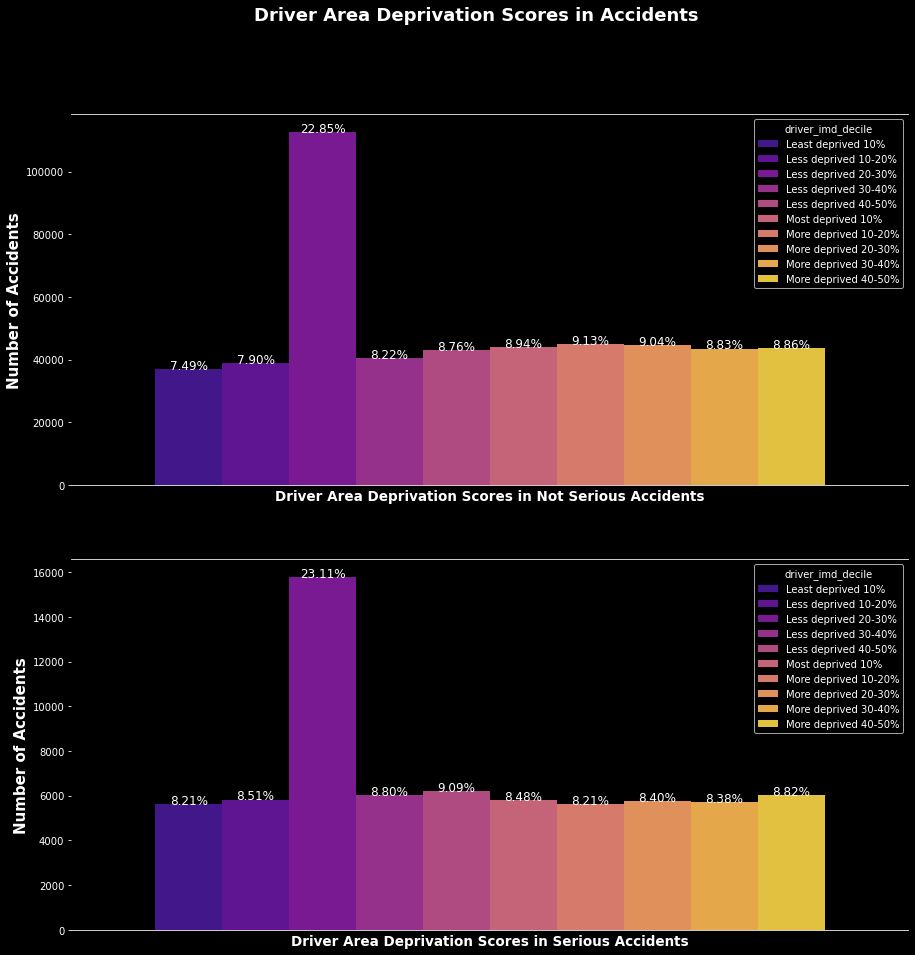

In [146]:
imd_order=["Least deprived 10%", "Less deprived 10-20%", "Less deprived 20-30%", 
           "Less deprived 30-40%","Less deprived 40-50%","Most deprived 10%",
           "More deprived 10-20%", "More deprived 20-30%", "More deprived 30-40%",
           "More deprived 40-50%"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="driver_imd_decile", hue_order=imd_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="driver_imd_decile", hue_order=imd_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Driver Area Deprivation Scores in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Driver Area Deprivation Scores in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Driver Area Deprivation Scores in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('driver_imd_decile.png')
fig.show()

# Junction Details in Accidents

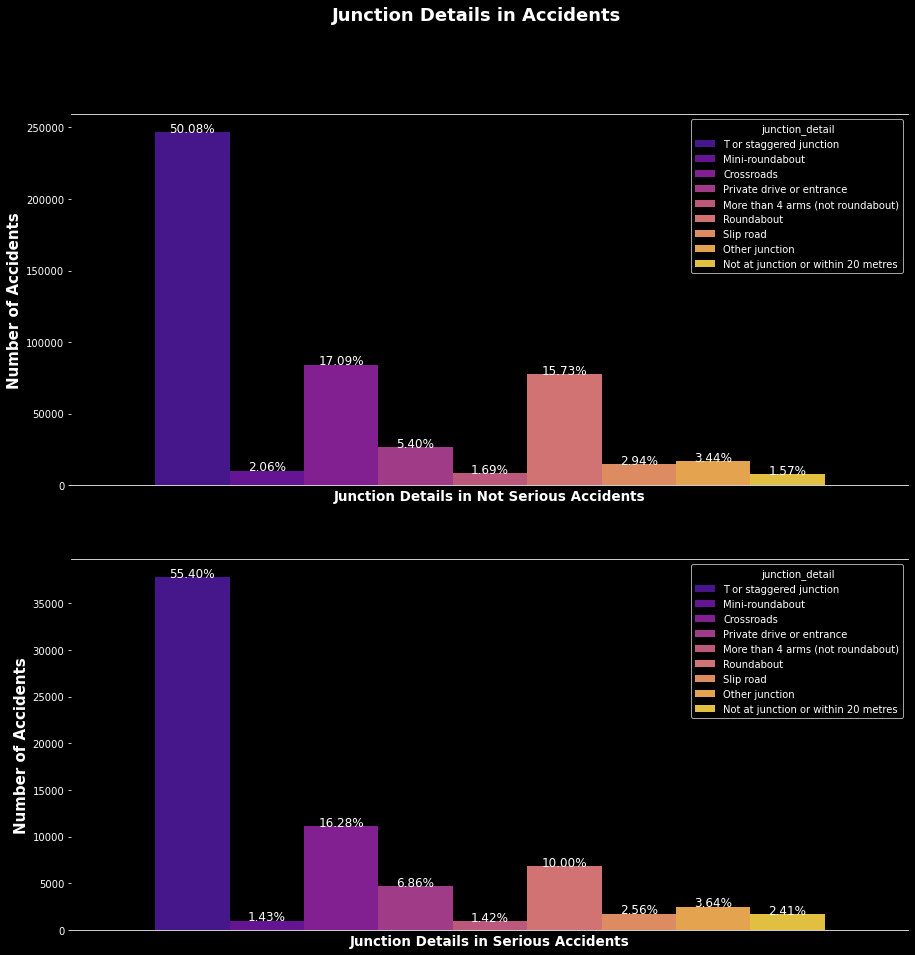

In [147]:
jud_order=['T or staggered junction', 'Mini-roundabout', 'Crossroads',
           'Private drive or entrance', 'More than 4 arms (not roundabout)',
           'Roundabout', 'Slip road', 'Other junction','Not at junction or within 20 metres']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="junction_detail", hue_order=jud_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="junction_detail", hue_order=jud_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Junction Details in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Junction Details in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Junction Details in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('junction_detail.png')
fig.show()

# Junction Locations in Accidents

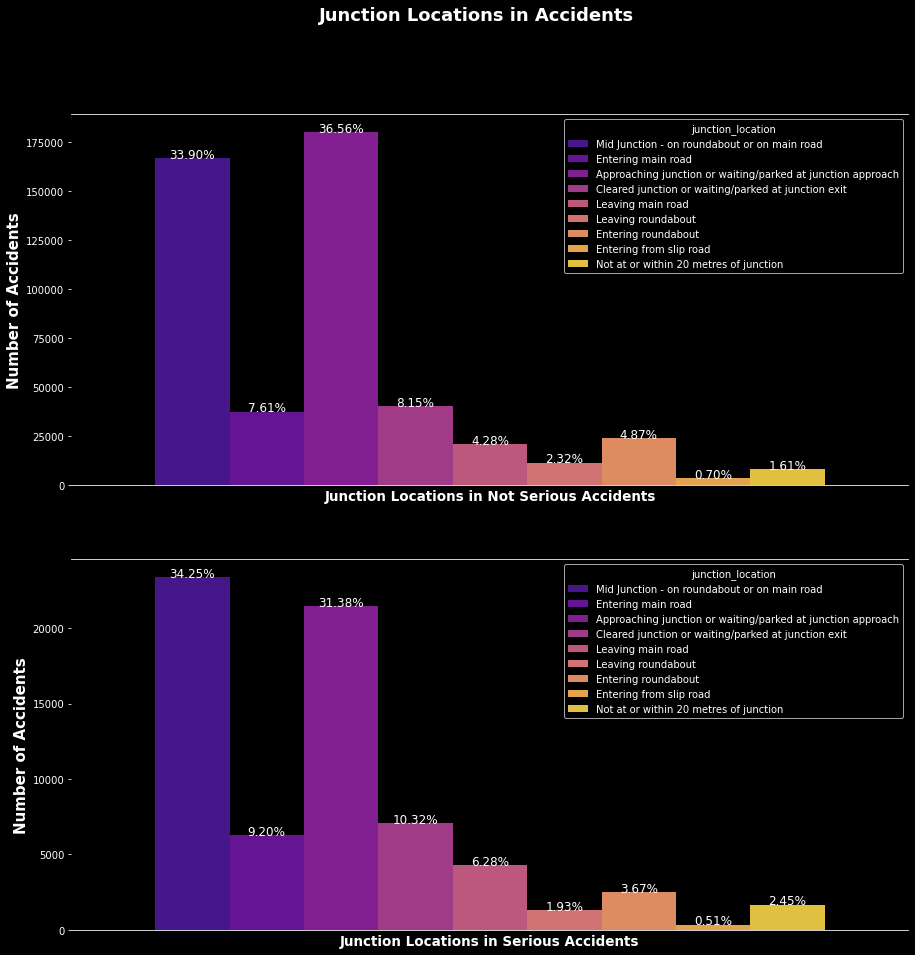

In [148]:
jul_order=['Mid Junction - on roundabout or on main road', 'Entering main road',
           'Approaching junction or waiting/parked at junction approach',
           'Cleared junction or waiting/parked at junction exit', 'Leaving main road',
           'Leaving roundabout', 'Entering roundabout', 'Entering from slip road',
           'Not at or within 20 metres of junction']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="junction_location", hue_order=jul_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="junction_location", hue_order=jul_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Junction Locations in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Junction Locations in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Junction Locations in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('junction_location.png')
fig.show()


# Propulsion Codes in Accidents

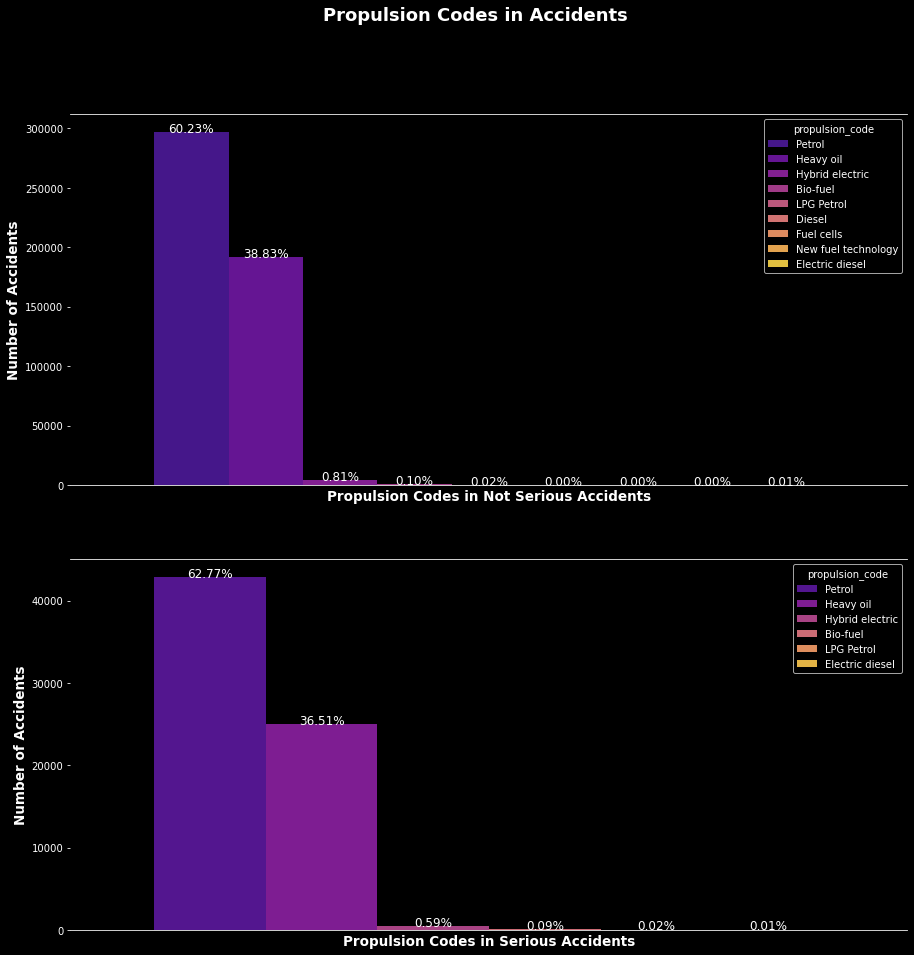

In [149]:
pd_order=['Petrol', 'Heavy oil', 'Hybrid electric', 'Bio-fuel', 'LPG Petrol', 'Diesel',
          'Fuel cells', 'New fuel technology', 'Electric diesel']
pd_order2=['Petrol', 'Heavy oil', 'Hybrid electric', 'Bio-fuel', 'LPG Petrol', 'Electric diesel']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="propulsion_code", hue_order=pd_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="propulsion_code", hue_order=pd_order2,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Propulsion Codes in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Propulsion Codes in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Propulsion Codes in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('propulsion_code.png')
fig.show()


# Accidents by Year

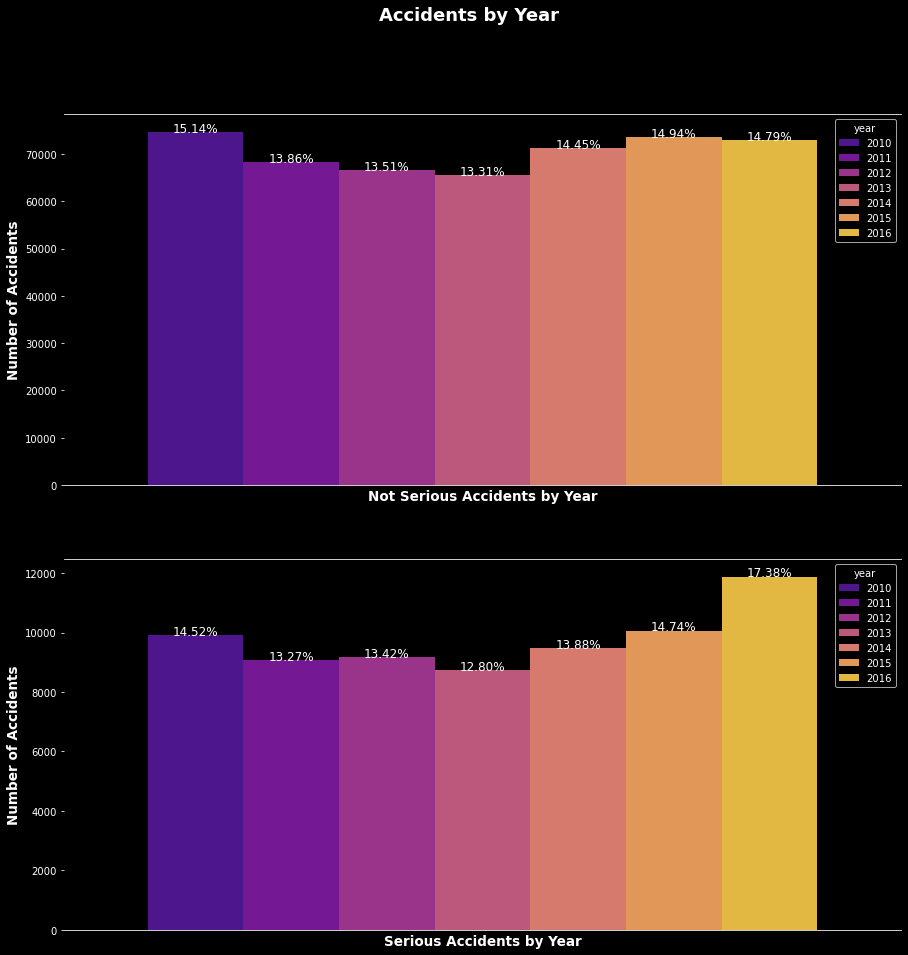

In [150]:
year_order=[2010, 2011, 2012, 2013, 2014, 2015, 2016]


fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="year", hue_order=year_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="year", hue_order=year_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Accidents by Year", fontsize=18, fontweight="bold")
ax1.set_xlabel('Not Serious Accidents by Year\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Serious Accidents by Year', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('year.png')
fig.show()

# Junction Control by Junction Detail

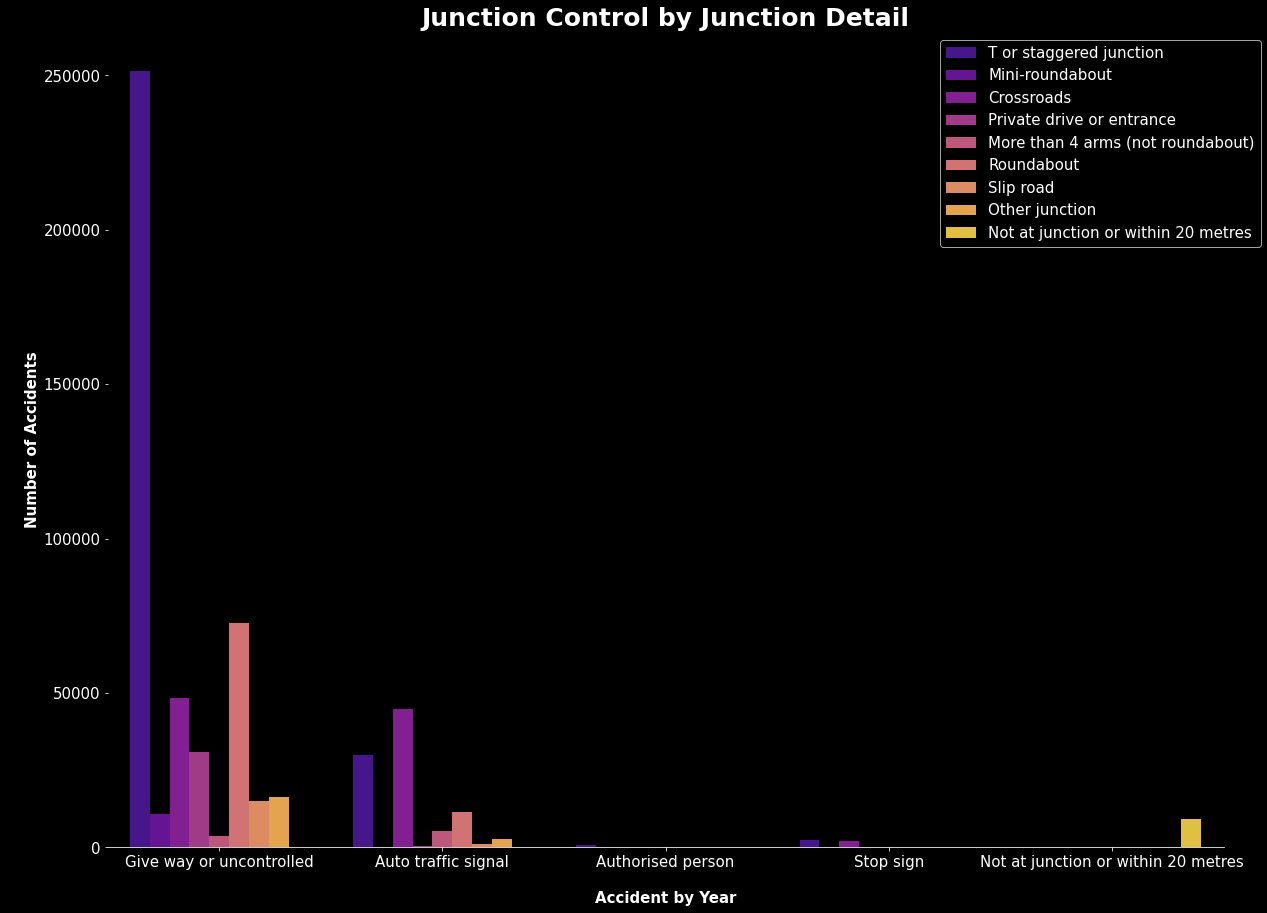

In [151]:
#Not Serious Accident
plt.figure(figsize=(20,15))
ax=sns.countplot("junction_control", hue="junction_detail",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("Junction Control by Junction Detail",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('junction_control_by_junction_detail.png')
plt.show()


# Junction Control by Junction Location in Accidents

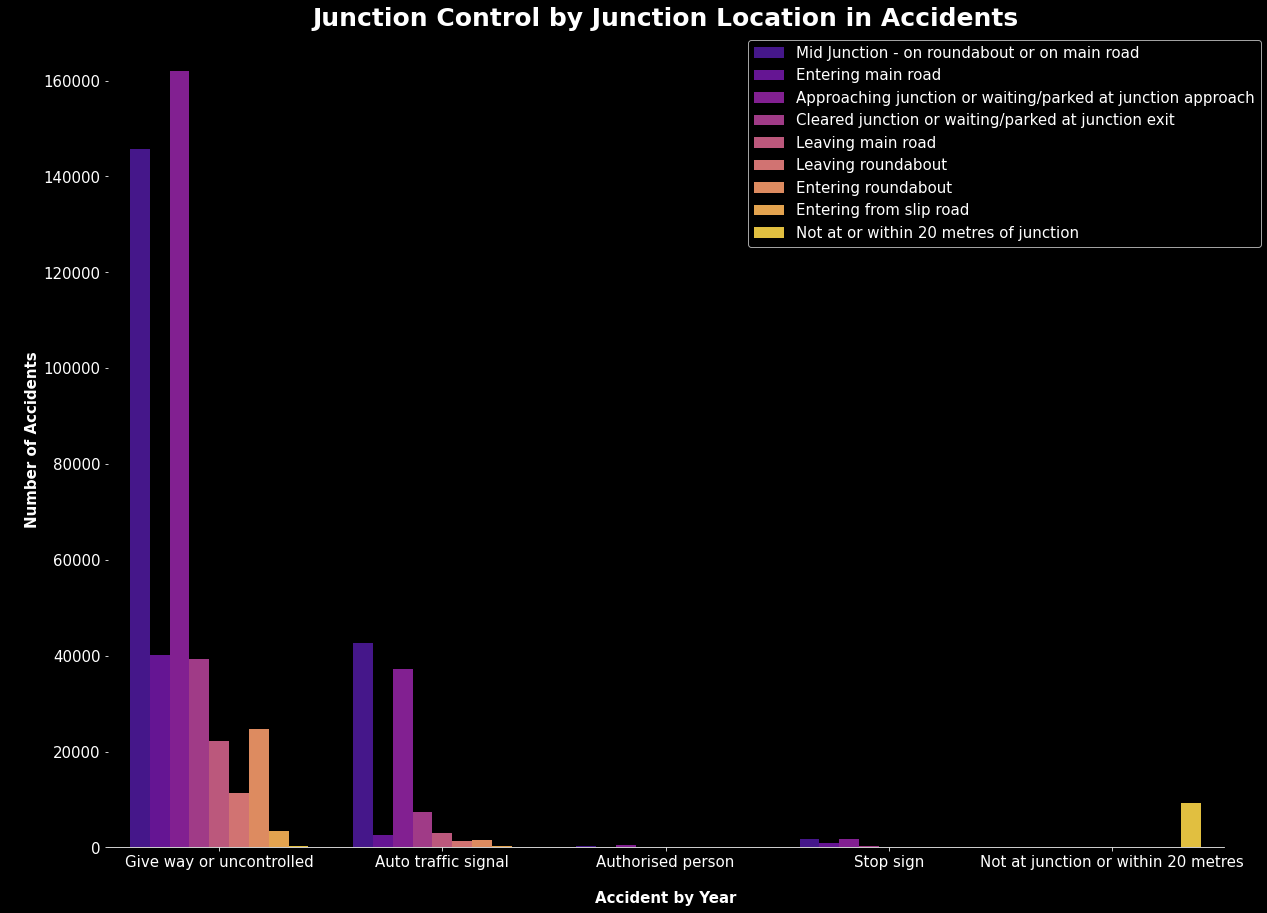

In [152]:
plt.figure(figsize=(20,15))
ax=sns.countplot("junction_control", hue="junction_location",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("Junction Control by Junction Location in Accidents",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('junction_control_by_junction_location.png')
plt.show()

# First point of Impact by Junction Detail

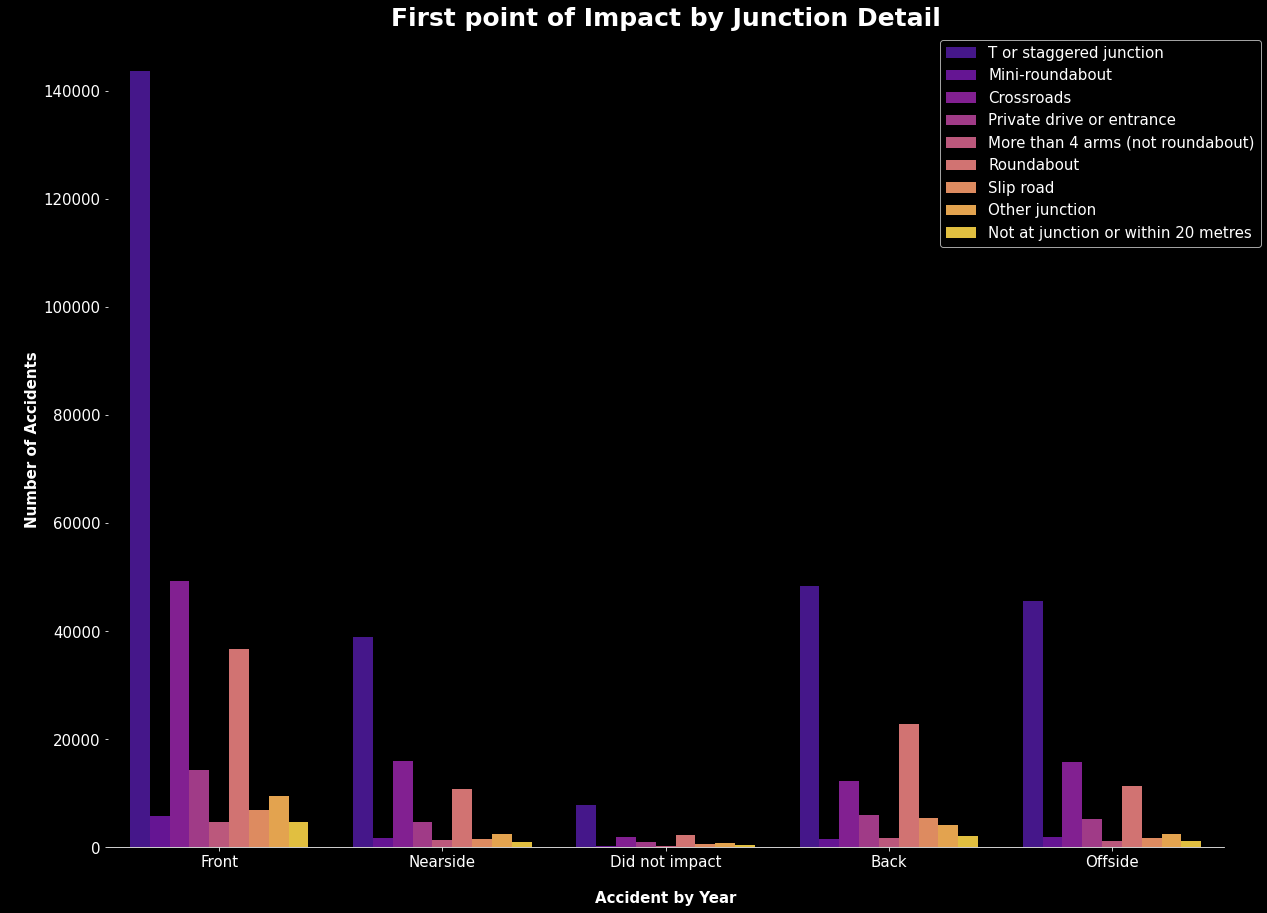

In [153]:
plt.figure(figsize=(20,15))
ax=sns.countplot("x1st_point_of_impact", hue="junction_detail",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("First point of Impact by Junction Detail",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('x1st_point_of_impact_by_junction_detail.png')
plt.show()


# First point of Impact by Junction Location

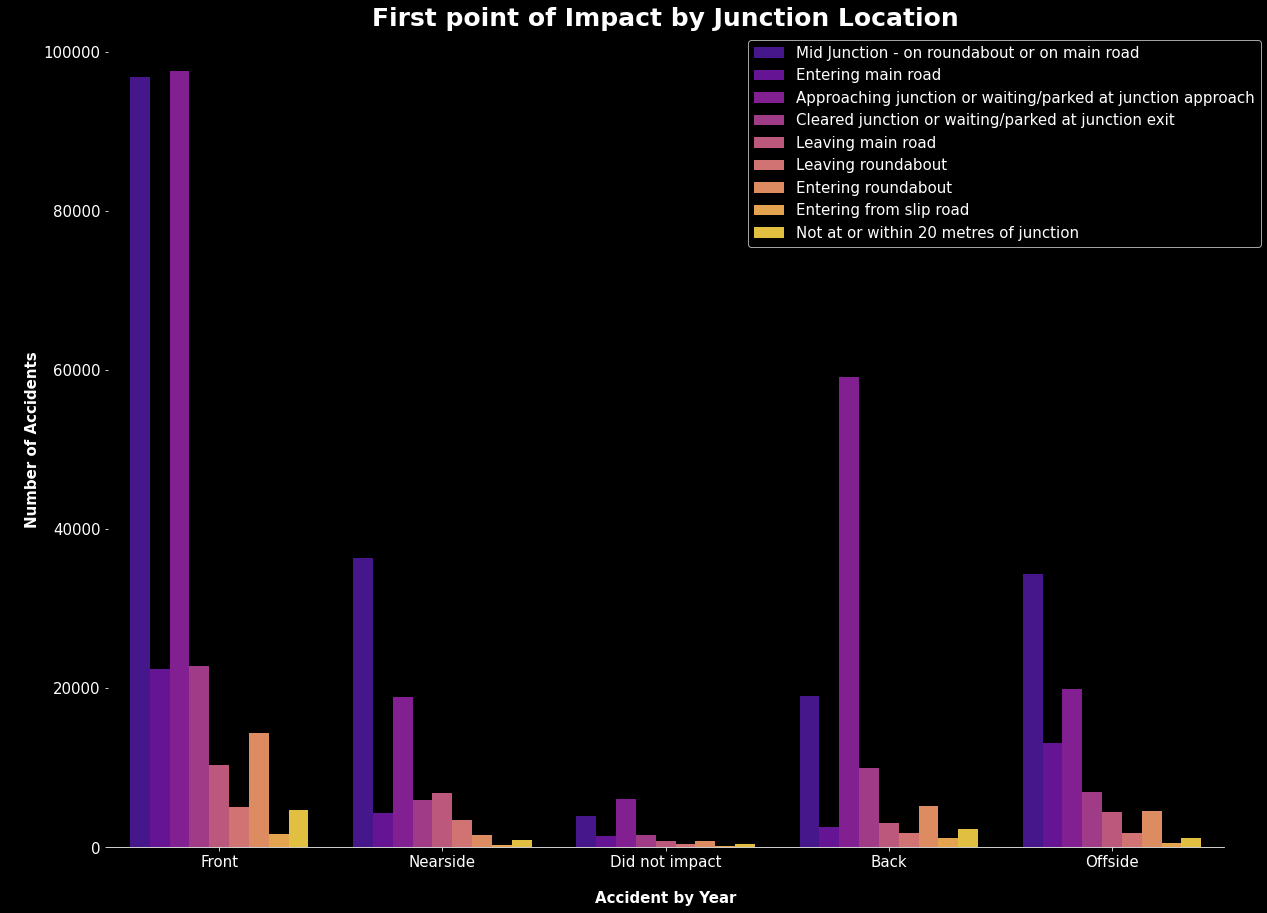

In [154]:
plt.figure(figsize=(20,15))
ax=sns.countplot("x1st_point_of_impact", hue="junction_location",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("First point of Impact by Junction Location",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('x1st_point_of_impact_by_junction_location.png')
plt.show()

# First point of Impact by Junction Control

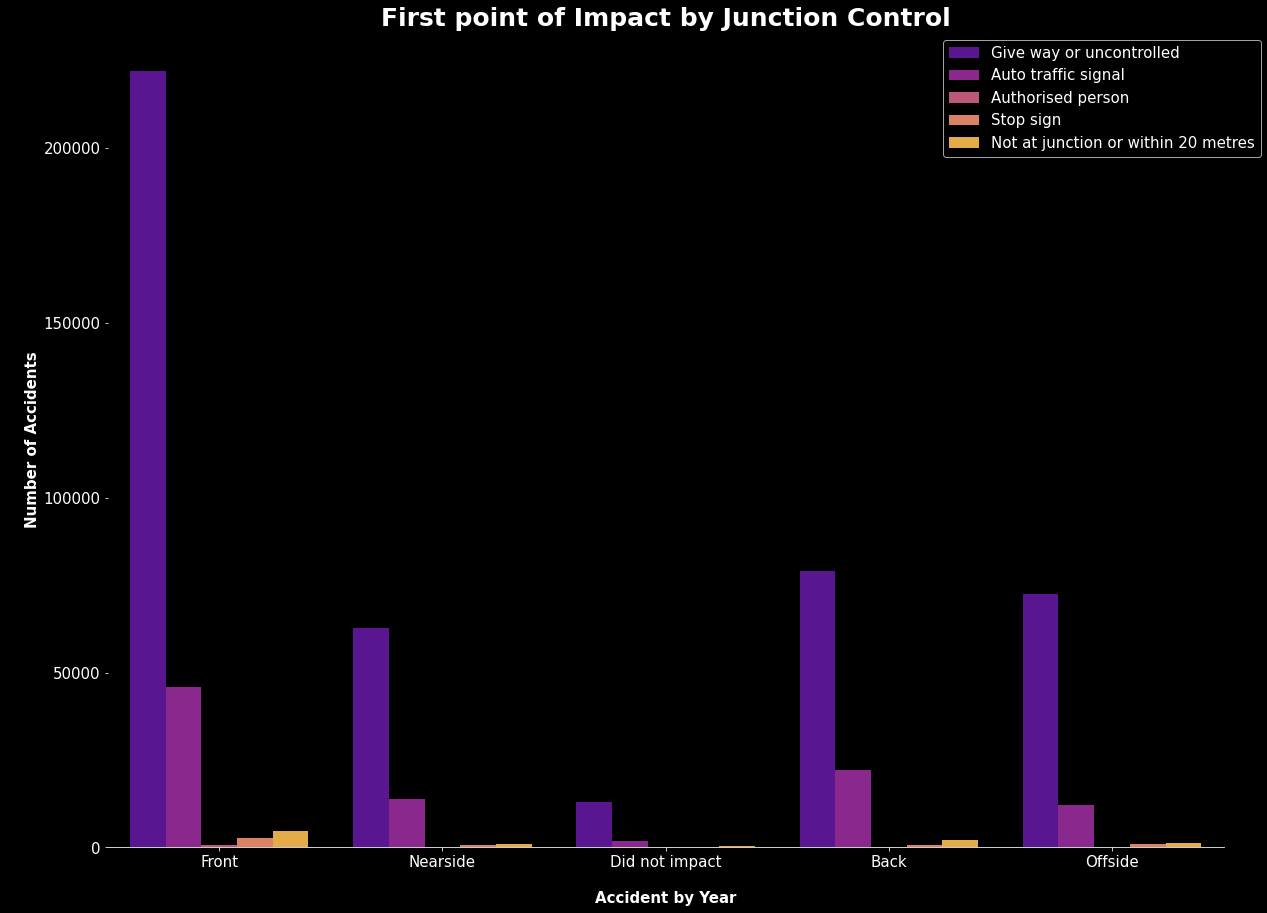

In [155]:
plt.figure(figsize=(20,15))
ax=sns.countplot("x1st_point_of_impact", hue="junction_control",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("First point of Impact by Junction Control",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('x1st_point_of_impact_by_junction_control.png')
plt.show()